# 9.ChIP-seq
## 9.6 Peak calling
### 9.6.3 Peak calling: Broad regions
sharp / broad ピークの両方を検出するために `normR` ライブラリをここでは使用する。

In [3]:
# ChIP-seq のデータのルートパス
data_path = "../data/chip-seq"

# H3K36me3 の ChIP-seq データのファイルパスを取得
chip_file    = file.path(data_path, 'GM12878_hg38_H3K36me3.chr21.bam')

# input データのファイルパスを取得
control_file = file.path(data_path, 'GM12878_hg38_Input_r5.chr21.bam')

In [5]:
library(normr)

In [6]:
# window width を 5000bp に設定
countConfiguration = countConfigSingleEnd(binsize = 5000)

In [7]:
# enrichR を使って broad peaks を同定する
h3k36_fit = enrichR(
            
            # ChIP ファイル
            treatment   = chip_file,
            
            # control ファイル
            control     = control_file,
            
            # ゲノムバージョン
            genome      = "hg38",
            verbose     = FALSE,
            
            # window サイズ
            countConfig = countConfiguration)

Warning message:
“'fetchExtendedChromInfoFromUCSC' is deprecated.
Use 'getChromInfoFromUCSC' instead.
See help("Deprecated")”
Warning message in .local(bampath, gr, ...):
“some ranges' widths are not a multiple of the selected
             binsize, some bins will correspond to less than binsize basepairs”
Warning message in .local(bampath, gr, ...):
“some ranges' widths are not a multiple of the selected
             binsize, some bins will correspond to less than binsize basepairs”


In [8]:
# Summary データを見てみる
summary(h3k36_fit)

NormRFit-class object

Type:                  'enrichR'
Number of Regions:     617665
Number of Components:  2
Theta* (naive bg):     0.197
Background component B: 1

+++ Results of fit +++ 
Mixture Proportions:
Background       Class 1    
     85.4%         14.6%    
Theta:
Background       Class 1    
     0.138         0.442    

Bayesian Information Criterion:	741525

+++ Results of binomial test +++ 
T-Filter threshold: 5
Number of Regions filtered out: 610736
Significantly different from background B based on q-values:
TOTAL:
          ***       **        *        .              n.s.
Bins        0     1005      314      381      237     4992
%        0.00     9.18    12.04    15.52    17.68    45.58
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 '  ' 1 'n.s.'



同定されたピークを可視化する

In [9]:
# broad peaks のゲノム座標軸を取得(GRanges オブジェクトに変換)
h3k36_peaks = getRanges(h3k36_fit)
h3k36_peaks

GRanges object with 617665 ranges and 1 metadata column:
           seqnames            ranges strand | component
              <Rle>         <IRanges>  <Rle> | <integer>
       [1]     chr1            1-5000      * |      <NA>
       [2]     chr1        5001-10000      * |      <NA>
       [3]     chr1       10001-15000      * |      <NA>
       [4]     chr1       15001-20000      * |      <NA>
       [5]     chr1       20001-25000      * |      <NA>
       ...      ...               ...    ... .       ...
  [617661]     chrY 57205001-57210000      * |      <NA>
  [617662]     chrY 57210001-57215000      * |      <NA>
  [617663]     chrY 57215001-57220000      * |      <NA>
  [617664]     chrY 57220001-57225000      * |      <NA>
  [617665]     chrY 57225001-57227415      * |      <NA>
  -------
  seqinfo: 24 sequences from an unspecified genome

In [10]:
# qvalue と enrichment を抽出し、先程作った GRange オブジェクトに列を追加
h3k36_peaks$qvalue     = getQvalues(h3k36_fit)
h3k36_peaks$enrichment = getEnrichment(h3k36_fit)
h3k36_peaks

GRanges object with 617665 ranges and 3 metadata columns:
           seqnames            ranges strand | component    qvalue enrichment
              <Rle>         <IRanges>  <Rle> | <integer> <numeric>  <numeric>
       [1]     chr1            1-5000      * |      <NA>        NA          0
       [2]     chr1        5001-10000      * |      <NA>        NA          0
       [3]     chr1       10001-15000      * |      <NA>        NA          0
       [4]     chr1       15001-20000      * |      <NA>        NA          0
       [5]     chr1       20001-25000      * |      <NA>        NA          0
       ...      ...               ...    ... .       ...       ...        ...
  [617661]     chrY 57205001-57210000      * |      <NA>        NA          0
  [617662]     chrY 57210001-57215000      * |      <NA>        NA          0
  [617663]     chrY 57215001-57220000      * |      <NA>        NA          0
  [617664]     chrY 57220001-57225000      * |      <NA>        NA          0
  [617

In [13]:
# 適切な peaks を抽出
# リード数が 0 カウントの領域をカットする(component 列が NA の領域をカット)
h3k36_peaks = subset(h3k36_peaks, !is.na(component))

# q value < 0.01 のデータのみ抽出
h3k36_peaks = subset(h3k36_peaks, qvalue < 0.01)

# q value が小さい順に並び替え
h3k36_peaks = h3k36_peaks[order(h3k36_peaks$qvalue)]
h3k36_peaks

GRanges object with 961 ranges and 3 metadata columns:
        seqnames            ranges strand | component       qvalue enrichment
           <Rle>         <IRanges>  <Rle> | <integer>    <numeric>  <numeric>
    [1]    chr21 33550001-33555000      * |         1 7.71000e-214    1.76568
    [2]    chr21 44900001-44905000      * |         1 4.91188e-172    1.90642
    [3]    chr21 43685001-43690000      * |         1 5.01737e-170    1.98352
    [4]    chr21 42850001-42855000      * |         1 3.27313e-168    1.84401
    [5]    chr21 32345001-32350000      * |         1 8.44777e-160    1.97946
    ...      ...               ...    ... .       ...          ...        ...
  [957]    chr21 39835001-39840000      * |         1   0.00848164   0.610820
  [958]    chr21 40940001-40945000      * |         1   0.00848164   0.610820
  [959]    chr21   9620001-9625000      * |         1   0.00863594   1.586199
  [960]    chr21 28535001-28540000      * |         1   0.00877138   0.585849
  [961]  

In [16]:
library(GenomicRanges)

In [19]:
# overlap する領域同士をまとめる
# MEMO: https://bioconductor.org/packages/release/bioc/vignettes/GenomicRanges/inst/doc/GenomicRangesIntroduction.html#:~:text=reduce
h3k36_peaks = reduce(h3k36_peaks)
h3k36_peaks

GRanges object with 460 ranges and 0 metadata columns:
        seqnames            ranges strand
           <Rle>         <IRanges>  <Rle>
    [1]    chr21   5030001-5035000      *
    [2]    chr21   5130001-5150000      *
    [3]    chr21   6120001-6125000      *
    [4]    chr21   6425001-6430000      *
    [5]    chr21   6455001-6460000      *
    ...      ...               ...    ...
  [456]    chr21 46480001-46500000      *
  [457]    chr21 46510001-46520000      *
  [458]    chr21 46530001-46570000      *
  [459]    chr21 46640001-46655000      *
  [460]    chr21 46660001-46665000      *
  -------
  seqinfo: 24 sequences from an unspecified genome

In [33]:
library(GenomicRanges)
library(GenomicAlignments)

In [24]:
# 1つの BAM ファイルから、カバレッジデータを計算する関数
# MEMO: Sharp peaks から再掲
calculateCoverage = function(
  bam_file,
  extend = 200
){
  
  # BAM ファイルからリードデータを取得
  reads = readGAlignments(bam_file)
  
  # GRanges オブジェクトに変換
  reads = granges(reads)
  
  # リード長を 200bp に補正
  reads = resize(reads, width=extend, fix='start')
  
  # カバレッジ vector を取得
  cov   = coverage(reads)
  
  # sequencing depth に基づき補正(CPM を計算 & 小数点第２位以下を丸める)
  cov = round(cov * (1000000/length(reads)),2)
  
  # GRanges オブジェクトに変換
  cov   = as(cov, 'GRanges')
  
  # chr21 のみ抽出
  seqlevels(cov, pruning.mode='coarse') = 'chr21'
  return(cov)
}

In [25]:
# H3K36me3 と Input ファイルのカバレッジデータを作成
cont_cov = calculateCoverage(control_file)
h3k36_cov = calculateCoverage(chip_file)

In [26]:
library(Gviz)

In [27]:
# データトラックの用意(Control & H3K36me3)
data_tracks = list(
    h3k36 = DataTrack(h3k36_cov,  name = 'h3k36_cov',  type='h', lwd=3),
    input = DataTrack(cont_cov,   name = 'Input',      type='h', lwd=3)
)

In [28]:
# 可視化するゲノム座標軸の範囲を定義
start = min(start(h3k36_peaks[2])) - 25000
end   = max(end(h3k36_peaks[2])) + 25000

In [29]:
# peak track を用意
peak_track = AnnotationTrack(reduce(h3k36_peaks), name='H3K36me3')

In [31]:
# ideogram トラックを構築
# MEMO: 染色体の模式図(イデオグラム)のトラックを作成している
chr_track   = IdeogramTrack(
    chromosome = 'chr21', 
    genome     = 'hg38'
)

In [34]:
# ヒトゲノムの染色体長を取得
# getChromInfoFromUCSC： UCSC のゲノム情報を使用する
hg_chrs = getChromInfoFromUCSC('hg38')

# ヒトゲノムの21番染色体を取得
# grepl: chr21$ に一致するかどうか boolean で返す
# subset: data.frame(データフレーム) から grepl で true となる対象データを抽出する 
hg_chrs = subset(hg_chrs, grepl('chr21$',chrom))

# ダウンロードしたヒトゲノムの染色体長のデータ: data.frame(データフレーム)というデータ構造
# これを data.frame(データフレーム) から 名前付きベクター(配列)にデータ構造を変換する
# setnames: chrom を名前とした size の名前付きベクターを作成する
# with: データ構造を変換したり、データの絞り込みを行ったりできる(ここでは名前付きベクターにデータ構造を変換している)
seqlengths = with(hg_chrs, setNames(size, chrom))

# ゲノムの座標軸のトラックを構築
axis = GenomeAxisTrack(
    range = GRanges('chr21', IRanges(1, width=seqlengths))
)

In [40]:
# GenomicFeatures ライブラリの読み込み
library(GenomicFeatures)
# AnnotationHub ライブラリの読み込み
library(AnnotationHub)

In [45]:
# ヒト遺伝子のアノテーション情報を取得(ダウンロード)
# MEMO: GRCh38.92 -> AH61126 のデータを使用
# MEMO: 読み込みにかなり時間がかかる(5minぐらい)
hub = AnnotationHub()
gtf = hub[['AH61126']]

snapshotDate(): 2020-10-27

downloading 1 resources

retrieving 1 resource

loading from cache

Importing File into R ..

require("rtracklayer")



In [46]:
# chr21 のみを抽出
seqlevels(gtf, pruning.mode='coarse') = '21'

# Ensembl のデータは染色体名が「1, 2, 3,...」となっているので、「chr1, chr2, chr3,...」の形式に変換する
# 染色体名を抽出
ensembl_seqlevels = seqlevels(gtf)

# 染色体名に chr の prefix をつける
ucsc_seqlevels = paste0('chr', ensembl_seqlevels)

# 染色体名を置換
seqlevels(gtf, pruning.mode='coarse') = ucsc_seqlevels

# gtf アノテーション情報を data.base オブジェクトに変換
txdb = makeTxDbFromGRanges(gtf)

# transcript データベースを gene track オブジェクトとして定義
gene_track = GeneRegionTrack(txdb, chr='chr21', genome='hg38')

Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


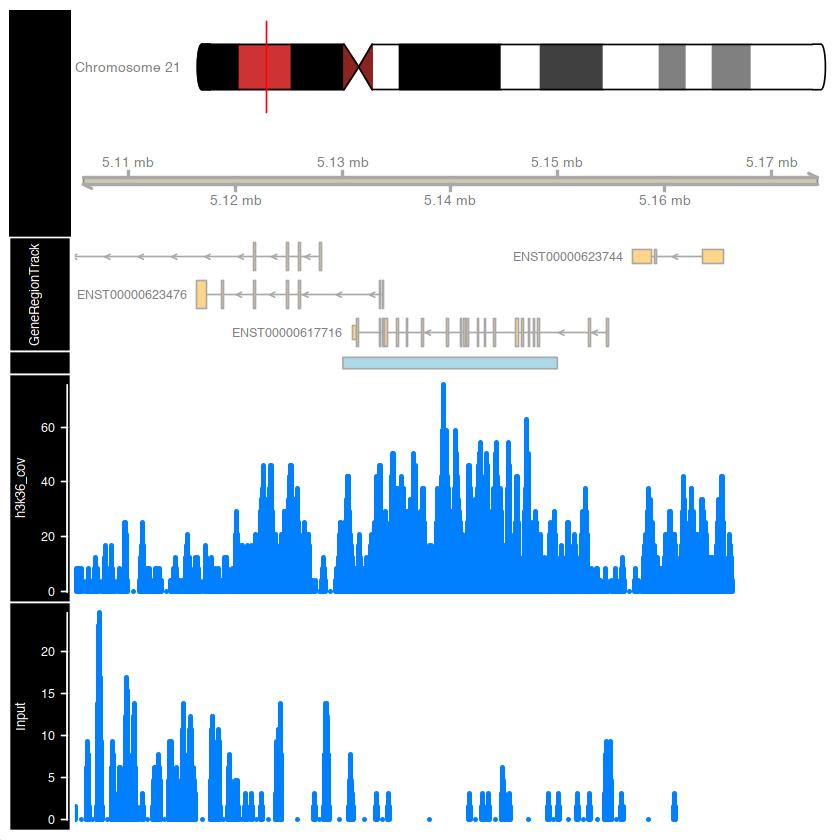

In [47]:
# enriched region を可視化
plotTracks(
    trackList = c(chr_track, axis, gene_track, peak_track, data_tracks),
    sizes     = c(.5,.5,.5,.1,1,1), 
    background.title     = "black",
    collapseTranscripts  = "longest", 
    transcriptAnnotation = "symbol",
    from = start,
    to   = end
)